In [86]:
import sys
print(sys.version)

from datetime import datetime, timedelta

from typing import List, Union

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

plt.style.use("grayscale")

plt.rcParams["figure.figsize"] = (9, 6)
plt.rcParams["figure.dpi"] = 300
plt.rcParams["axes.grid"] = False

import numpy as np
import pandas as pd

load = lambda x: pd.read_csv(
    x,
    index_col=0,
    header=0,
    parse_dates=["DATE"],
    date_parser=lambda d: datetime.strptime(d, "%Y-%m-%d")
)
# Load crude oil dataset
df = load("/Users/tianyudu/Documents/UToronto/Course/ECO499/ugthesis/data/ready_to_use/rpna_radius_0.3.csv")
df_raw = pd.read_csv("../data/ravenpack/crude_oil_all.csv")
df_oil = load("/Users/tianyudu/Documents/UToronto/Course/ECO499/ugthesis/data/ready_to_use/DCOILWTICO_FILLED.csv")

3.7.3 (default, Dec 13 2019, 19:58:14) 
[Clang 11.0.0 (clang-1100.0.33.17)]


In [87]:
total = df["NUM_POSITIVE_WESS"].sum() + df["NUM_NEGATIVE_WESS"].sum() + df["NUM_NEUTRAL_WESS"].sum()
print("Composition")
print(df["NUM_NEGATIVE_WESS"].sum() / total * 100)
print(df["NUM_NEUTRAL_WESS"].sum() / total * 100)
print(df["NUM_POSITIVE_WESS"].sum() / total * 100)

Composition
42.853403141361255
13.989341810022438
43.15725504861631


In [88]:
fig_path = "/Users/tianyudu/Documents/UToronto/Course/ECO499/ugthesis/figures/case_studies/"

### Notes: using unweighted ESS in order to factor out explanatory power of other variables and illustrate the distribution of ESS.

In [95]:
def ts_centre_plot(
    df: pd.DataFrame,
    df_oil: pd.DataFrame,
    criterion: str,
    date: datetime,
    delta_days: int = 15,
    save_to: Union[str, None] = None
) -> None:
    # Apply different density on x-axis for different range.
    if delta_days <= 30:
        datefmt = mdates.DateFormatter("%y-%m-%d")
    else:
        # datefmt = mdates.DateFormatter("%y-%U")
        datefmt = mdates.DateFormatter("")

    delta = timedelta(days=delta_days)
    subset = np.logical_and(
        df.index >= date - delta,
        df.index <= date + delta
    )

    drange = pd.date_range(
        start=date - delta,
        end=date + delta
    )

    fig, axes = plt.subplots(4, 1, sharex=True)

    names = ["Positive", "Negative", "Neutral"]

    for i, (ax, name) in enumerate(zip(axes[:3], names)):
        current = df[f"NUM_{name.upper()}_{criterion}"][subset]
        ax.plot(
            current.index,
            current.values,
            label=f"Number of {name} News"
        )
        ax.legend()
        ax.set_xticks(current.index)
        # ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
        ax.xaxis.set_major_formatter(datefmt)
        ax.xaxis.set_minor_formatter(datefmt)
        ax.set_ylabel("Num.")
    _ = plt.xticks(rotation=90)

    current_price = df_oil[
        np.logical_and(
            df_oil.index >= date - delta,
            df_oil.index <= date + delta
        )]

    axes[3].plot(
        current_price.index,
        current_price.values,
        label="Crude Oil Price (USD)"
    )
    ax.set_xticks(current_price.index)
    # ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
    ax.xaxis.set_major_formatter(datefmt)
    ax.xaxis.set_minor_formatter(datefmt)
    axes[3].legend()
    axes[3].set_ylabel("USD")

    # axes[0].plot(df[f"NUM_POSITIVE_{criterion}"][subset], label="Number of Positive News")
    # axes[1].plot(df[f"NUM_NEGATIVE_{criterion}"][subset], label="Number of Negative News")
    # axes[2].plot(df[f"NUM_NEUTRAL_{criterion}"][subset], label="Number of Neutral News")

    # for ax in axes:
    #     ax.legend()
    # axes.set_ylabel(f"Num of Events ({criterion})")

    # ax2=ax.twinx()
    # ax2.plot(
    #     df_oil[np.logical_and(
    #         df_oil.index >= date - delta,
    #         df_oil.index <= date + delta
    #     )],
    #     color="blue",
    #     marker="o",
    #     label="WTI Crude Oil Price",
    #     alpha=0.5
    # )
    # ax2.set_ylabel("Crude Oil Price (USD)")

    # Option 1: Use vertical line to indicate event time.
#     plt.axvline(
#         x=date, 
#         linestyle="--", 
#         label=datetime.strftime(date, "%Y-%m-%d"),
#         linewidth=0.7,
#         alpha=0.7,
#         color="red"
#     )

    # Option 2: Use cross on x-axis to indicate event time.
    # ax.scatter(date, 0, marker="x", s=60, color="red")
    # ax.legend(loc="upper right")
    # ax2.legend(loc="upper left")
    # ax.grid(True)
    # ax2.grid(False)
    
    if save_to is not None:
        plt.savefig(save_to, dpi=300, bbox_inches="tight")
    plt.show()

# Case 1: Nov. 30, 2016 (Positive Spike)

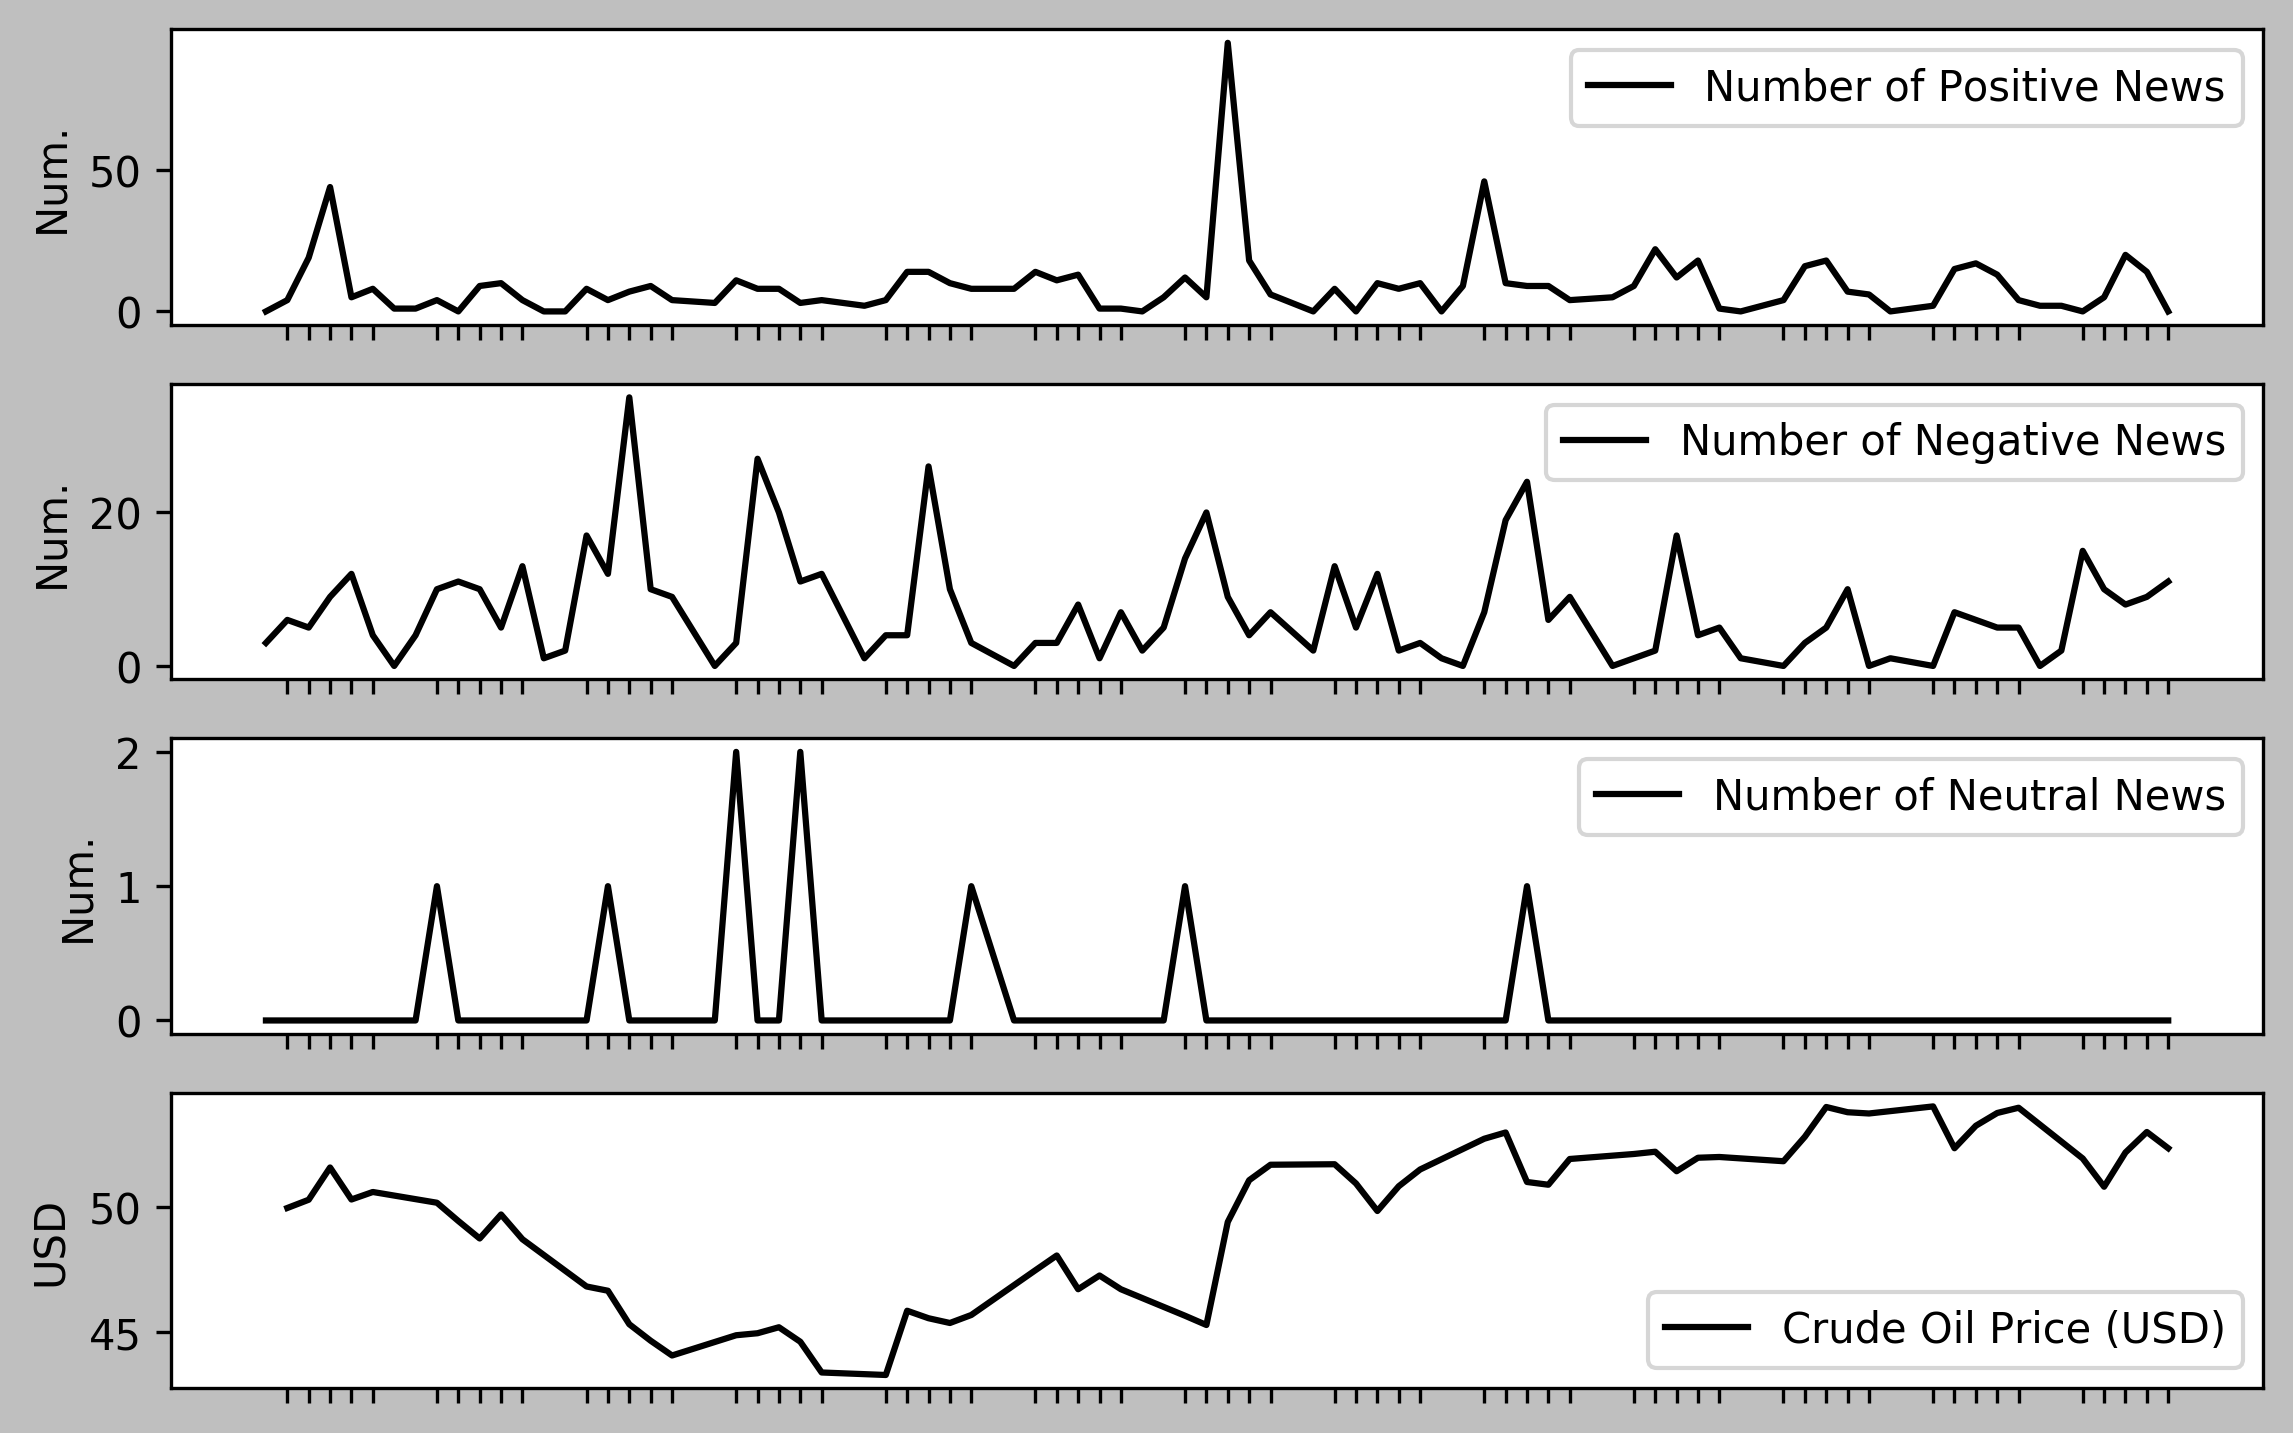

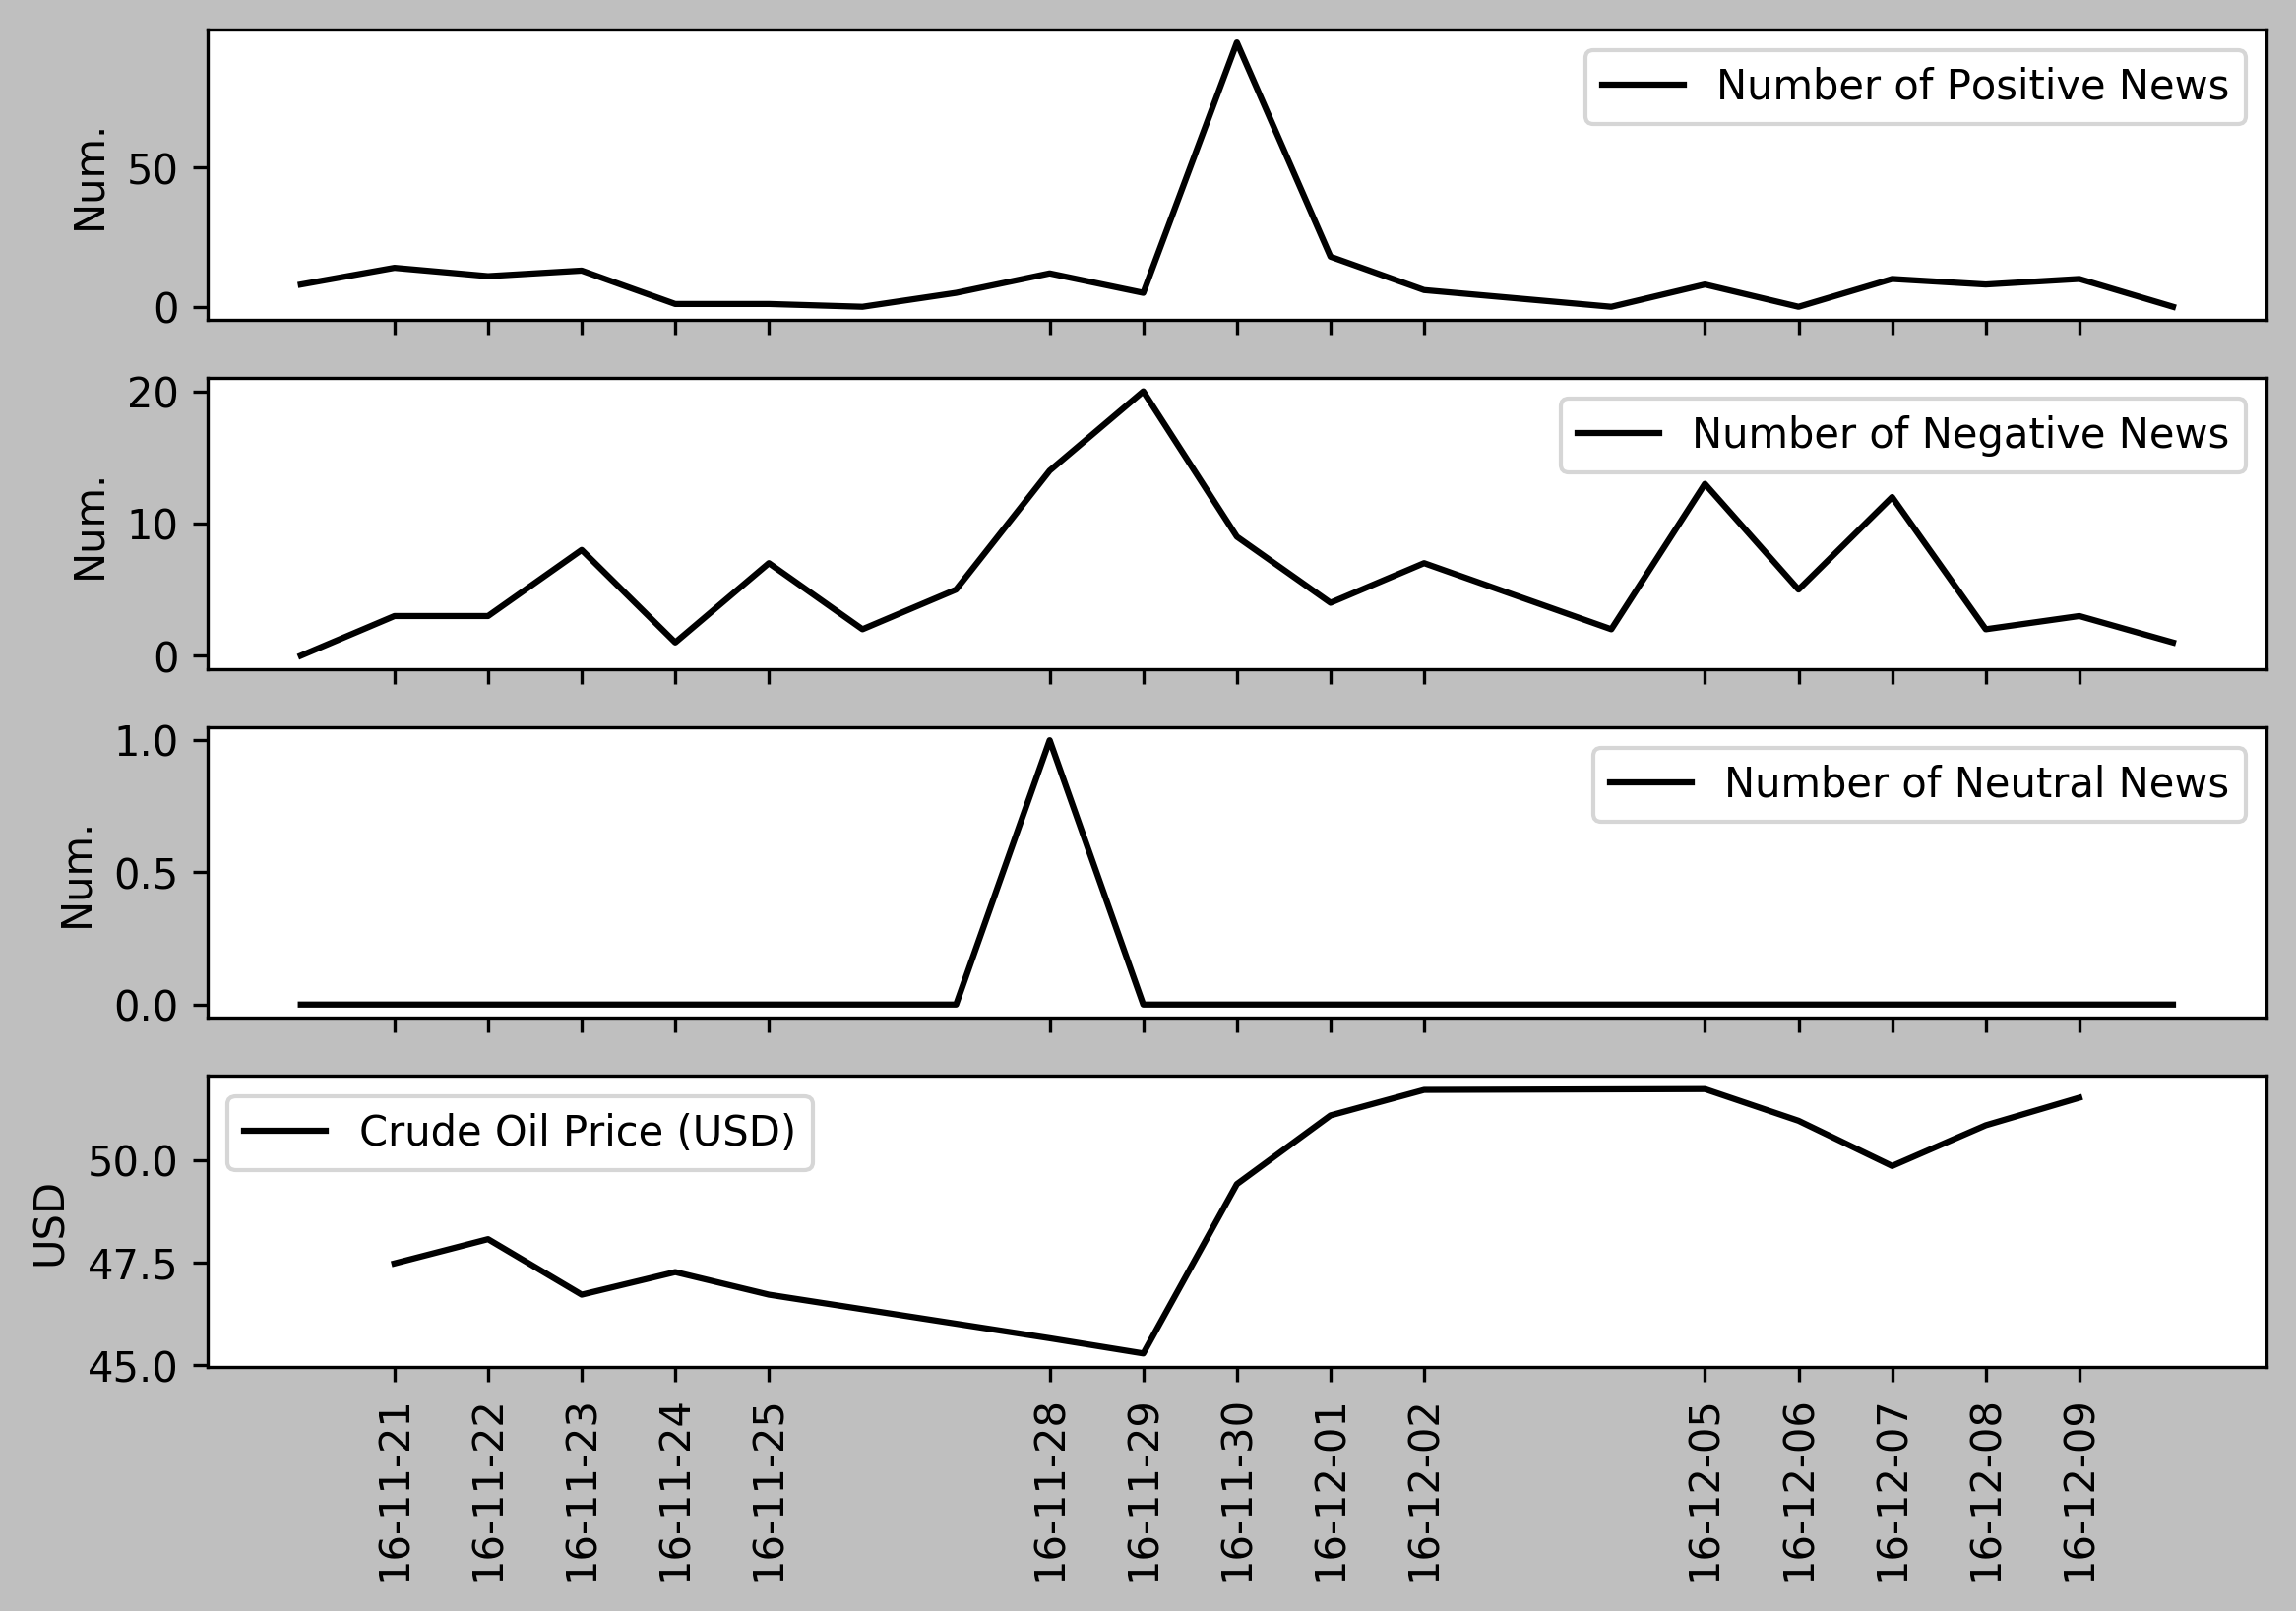

In [96]:
date = datetime(2016, 11, 30)
delta = timedelta(days=45)
ts_centre_plot(df, df_oil, "ESS", date, delta_days=45, save_to=fig_path+"20161130_45d.png")
ts_centre_plot(df, df_oil, "ESS", date, delta_days=10, save_to=fig_path+"20161130_10d.png")

# Case 2: Dec. 6, 2018 (Negative Spike)
> US becomes a net oil exporting country.

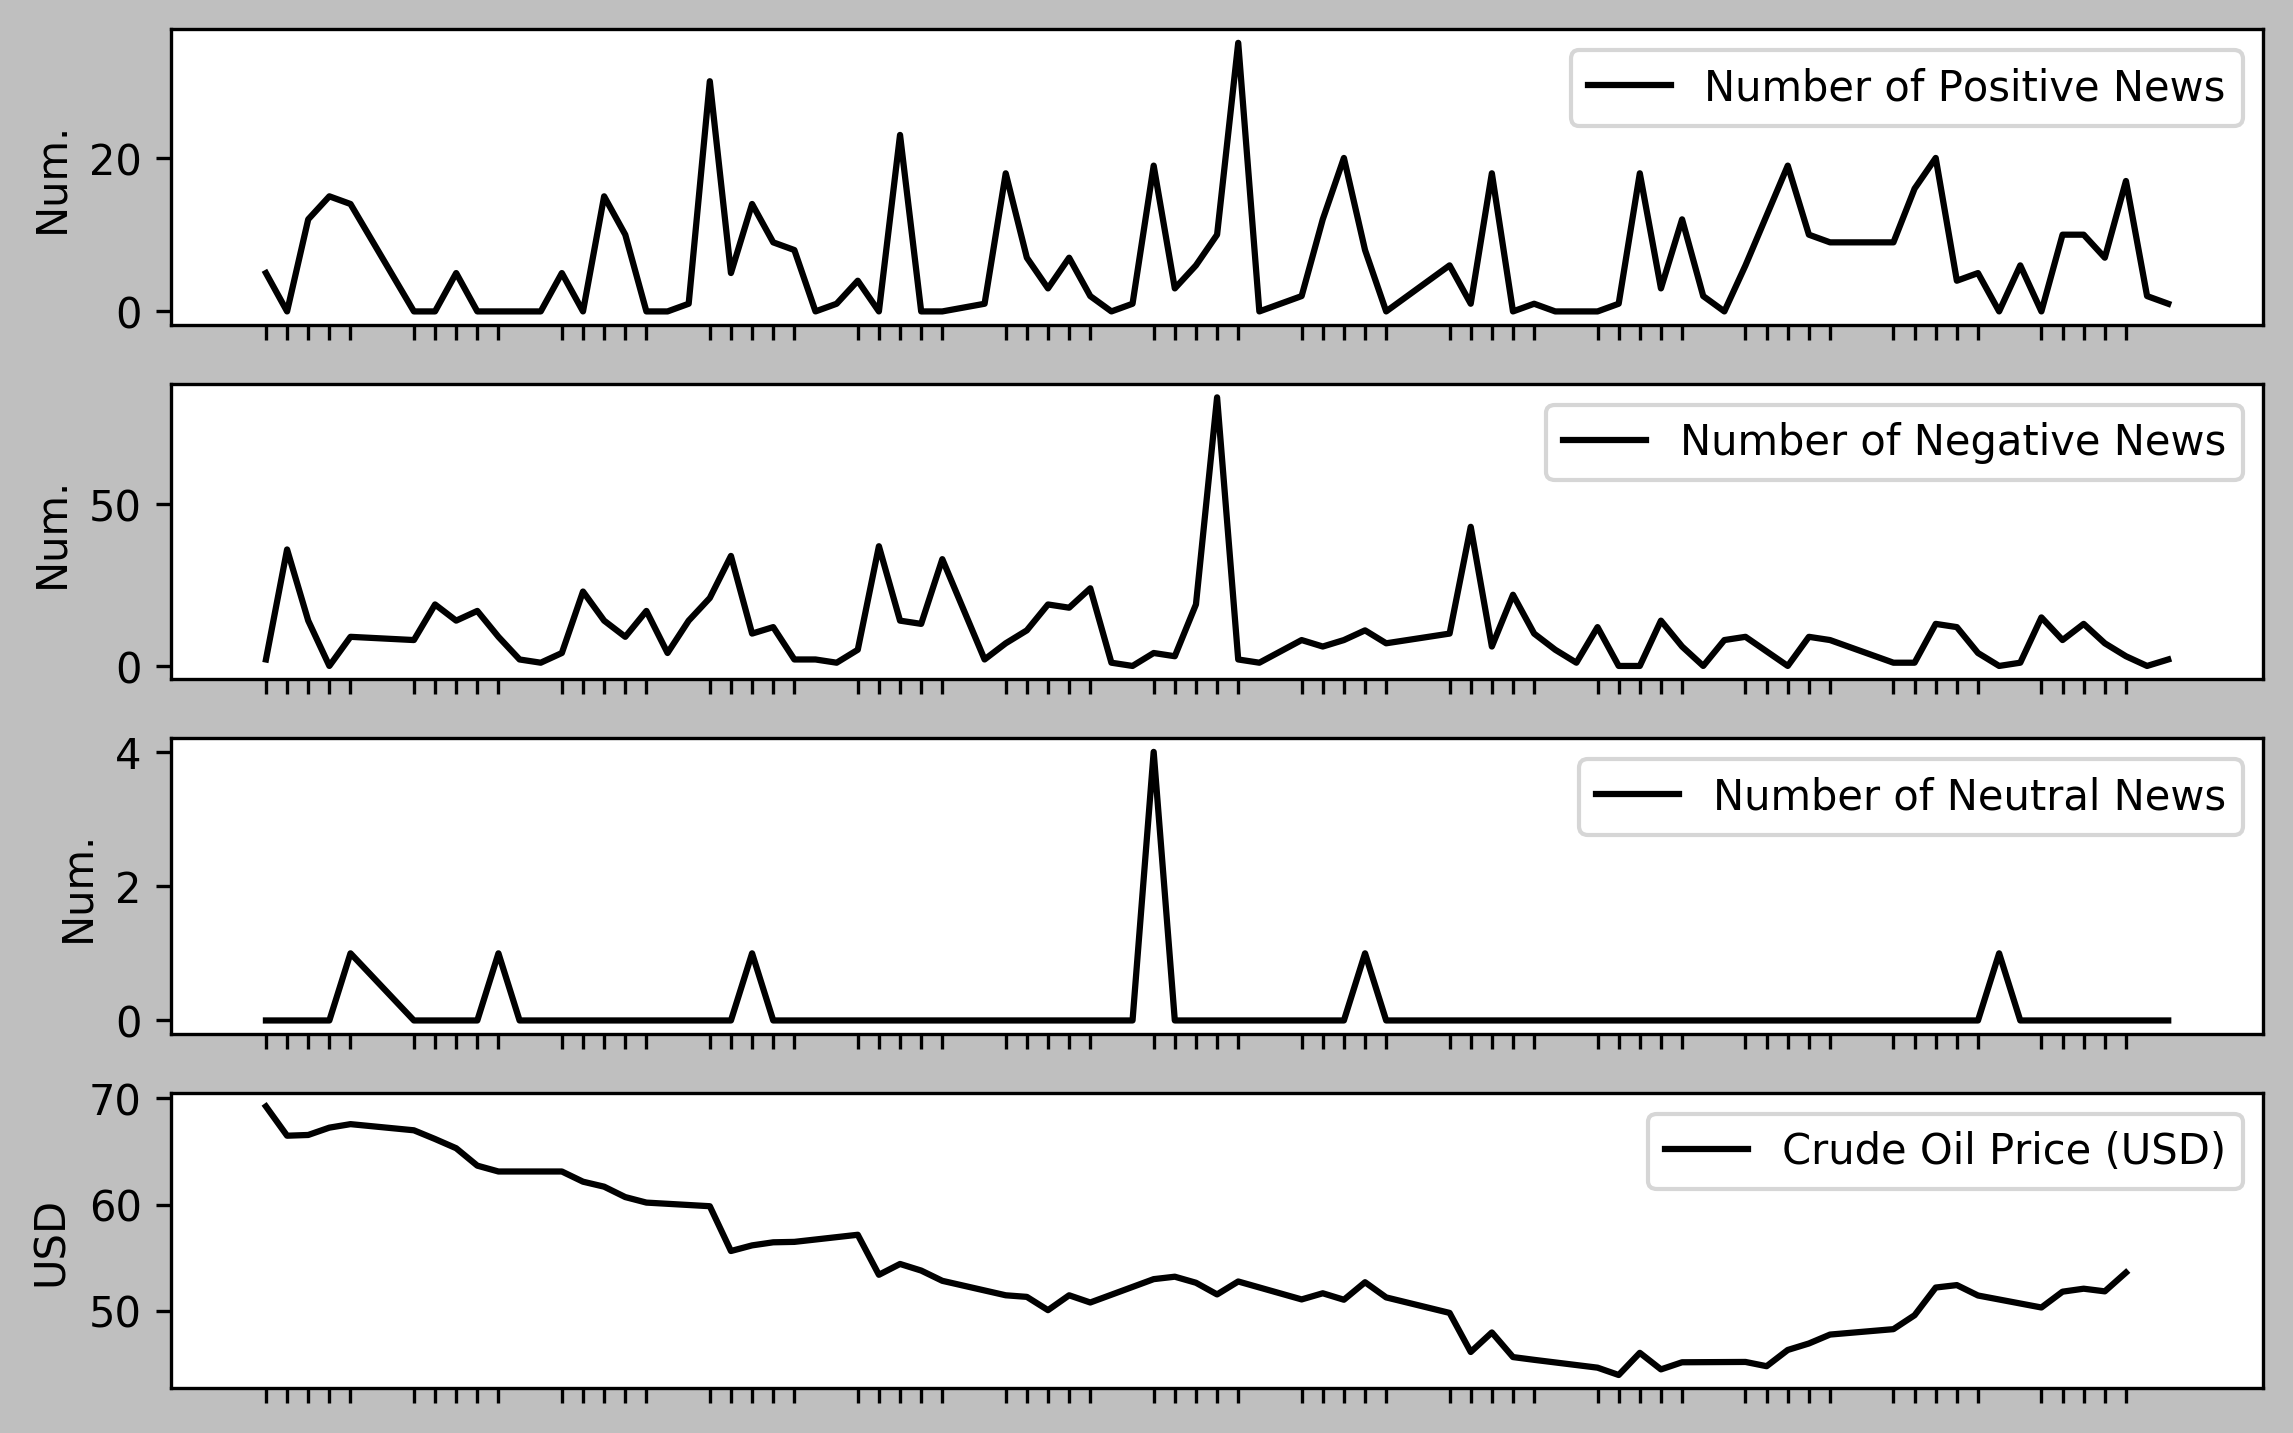

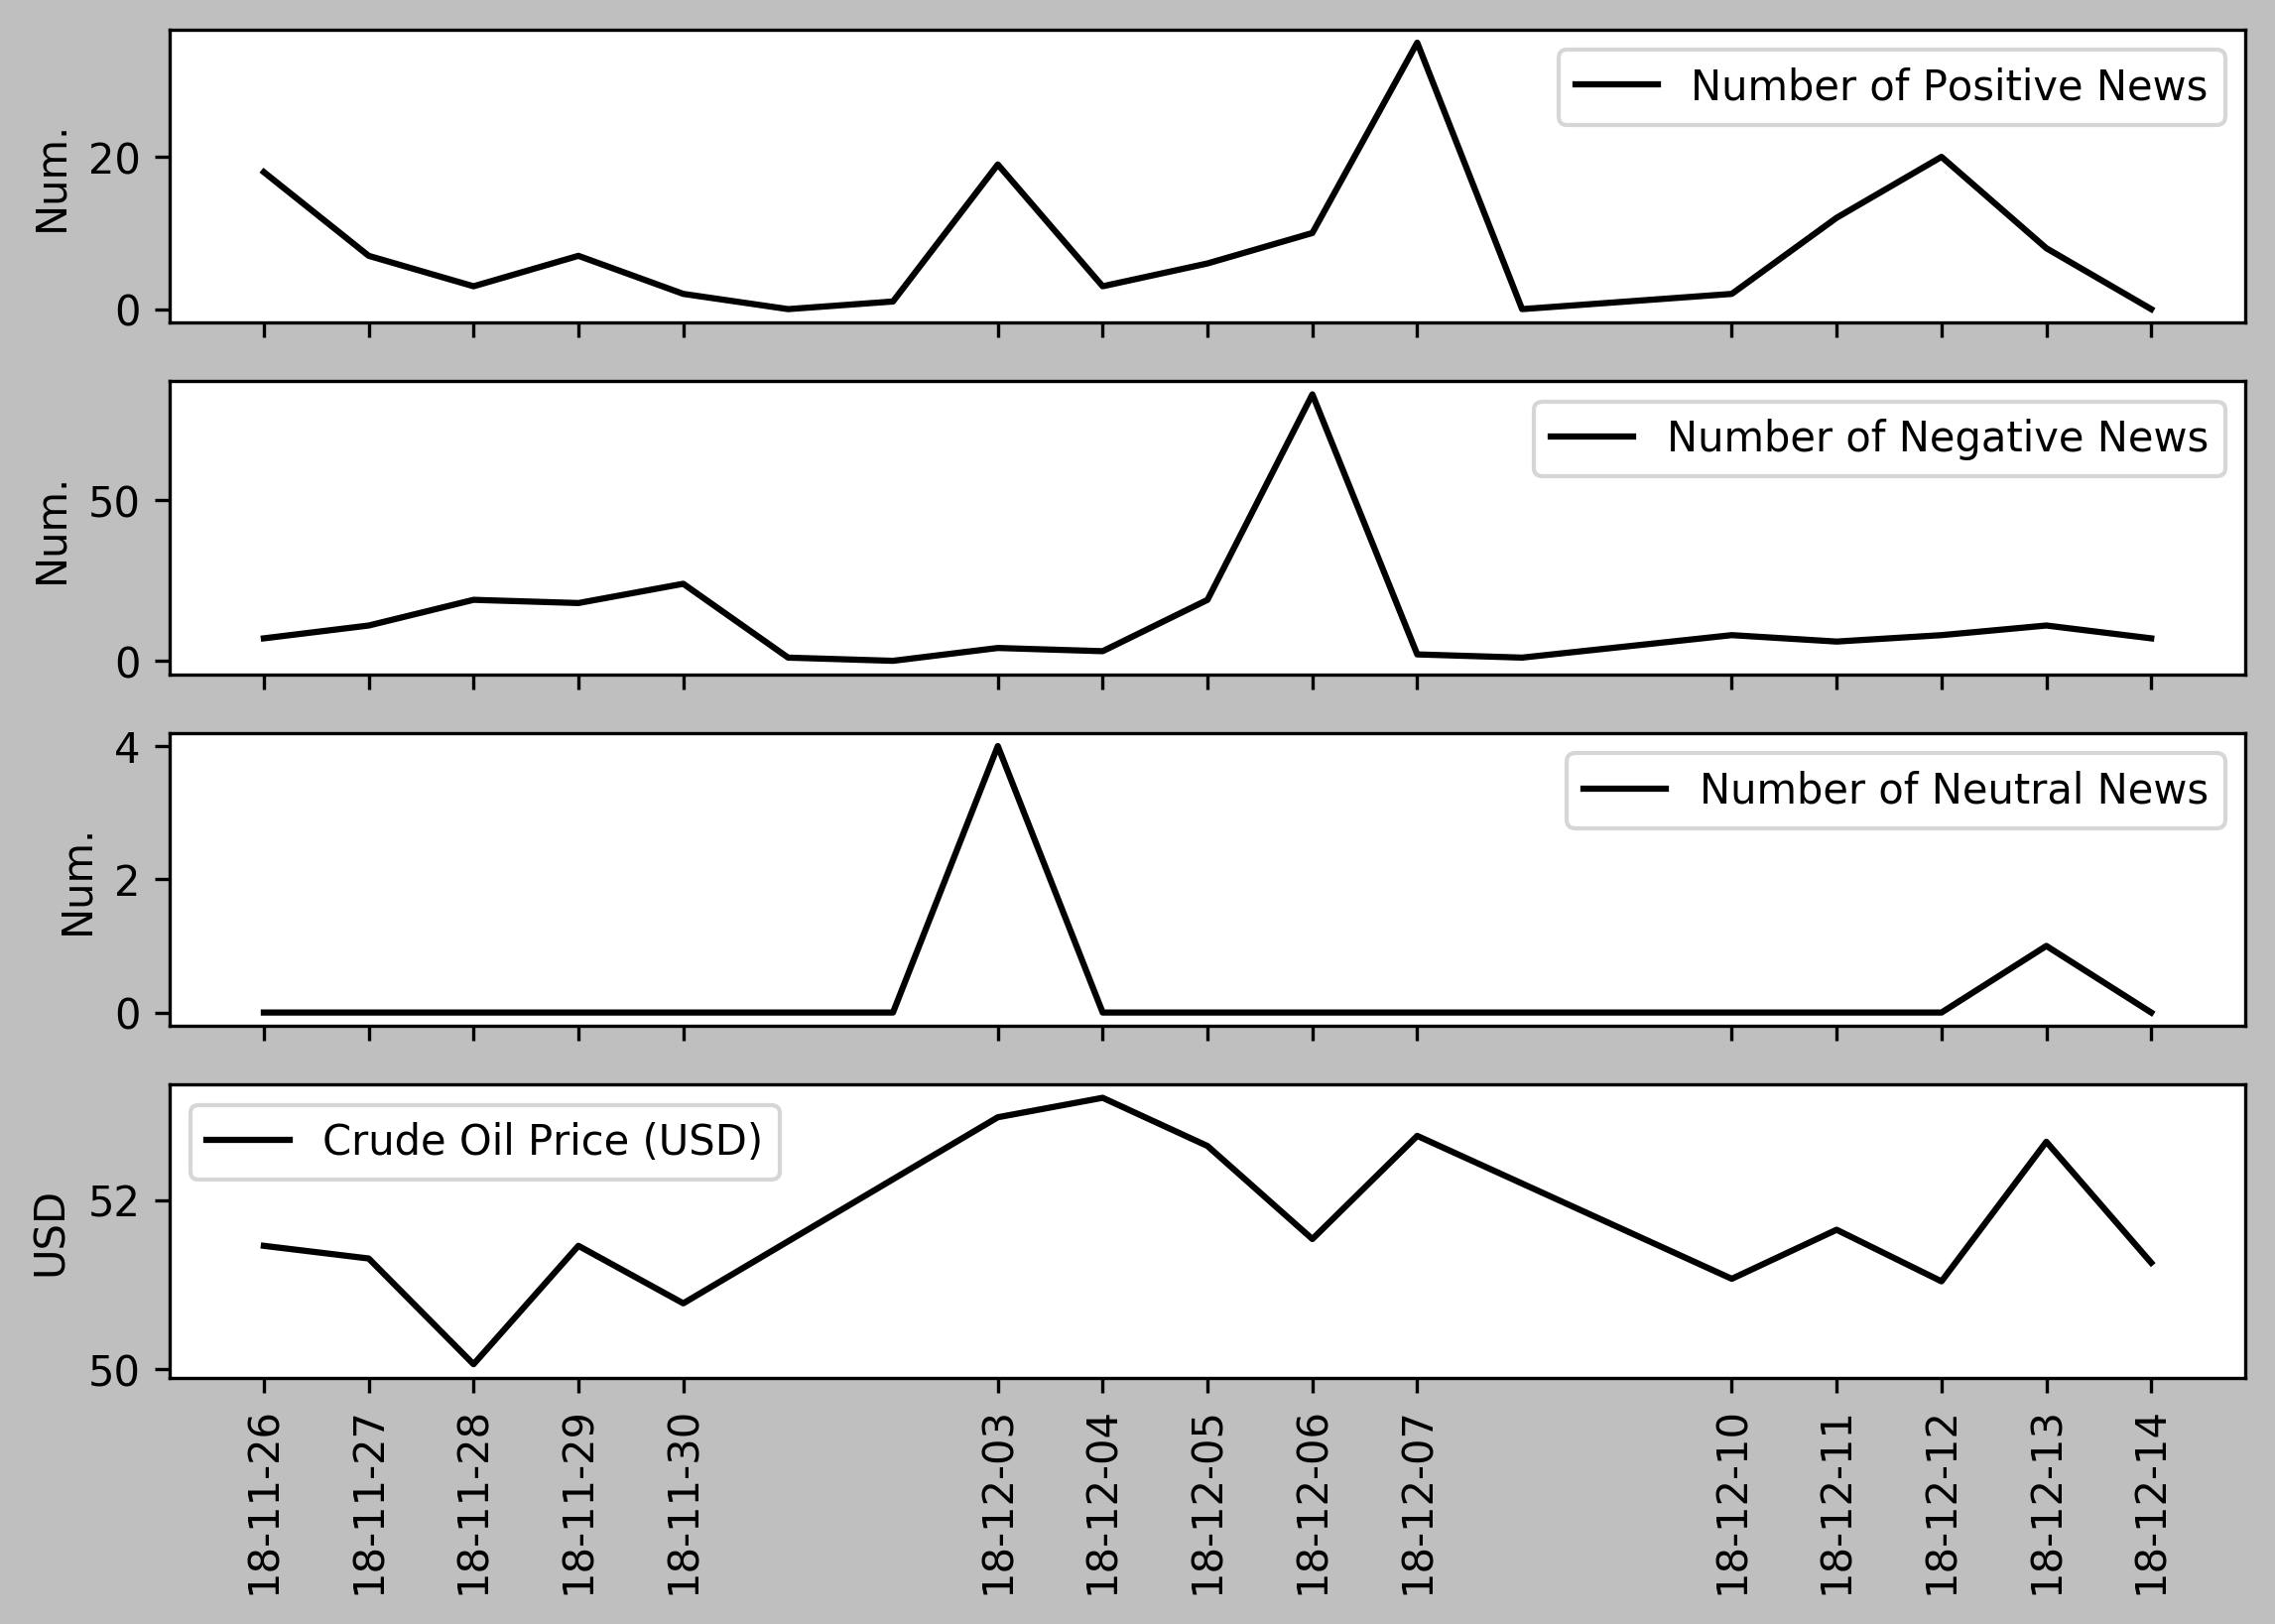

In [97]:
date = datetime(2018, 12, 6)
ts_centre_plot(df, df_oil, "ESS", date, delta_days=45, save_to=fig_path+"20181206_45d.png")
ts_centre_plot(df, df_oil, "ESS", date, delta_days=10, save_to=fig_path+"20181206_10d.png")

# Case 3: Jun. 12 ~ 13, 2019: Negative --> Positive Shifting (Gulf of Oman incident on Jun. 13)
> (From wikipedia) Following a month-long decrease, the price of oil initially increased by 4% after the incident, then settled to an increase of 2%. The increase in oil prices has been attributed to uncertainty regarding the supply of oil, due to reduced shipping in the Strait of Hormuz as a result of this incident

<https://en.wikipedia.org/wiki/June_2019_Gulf_of_Oman_incident>

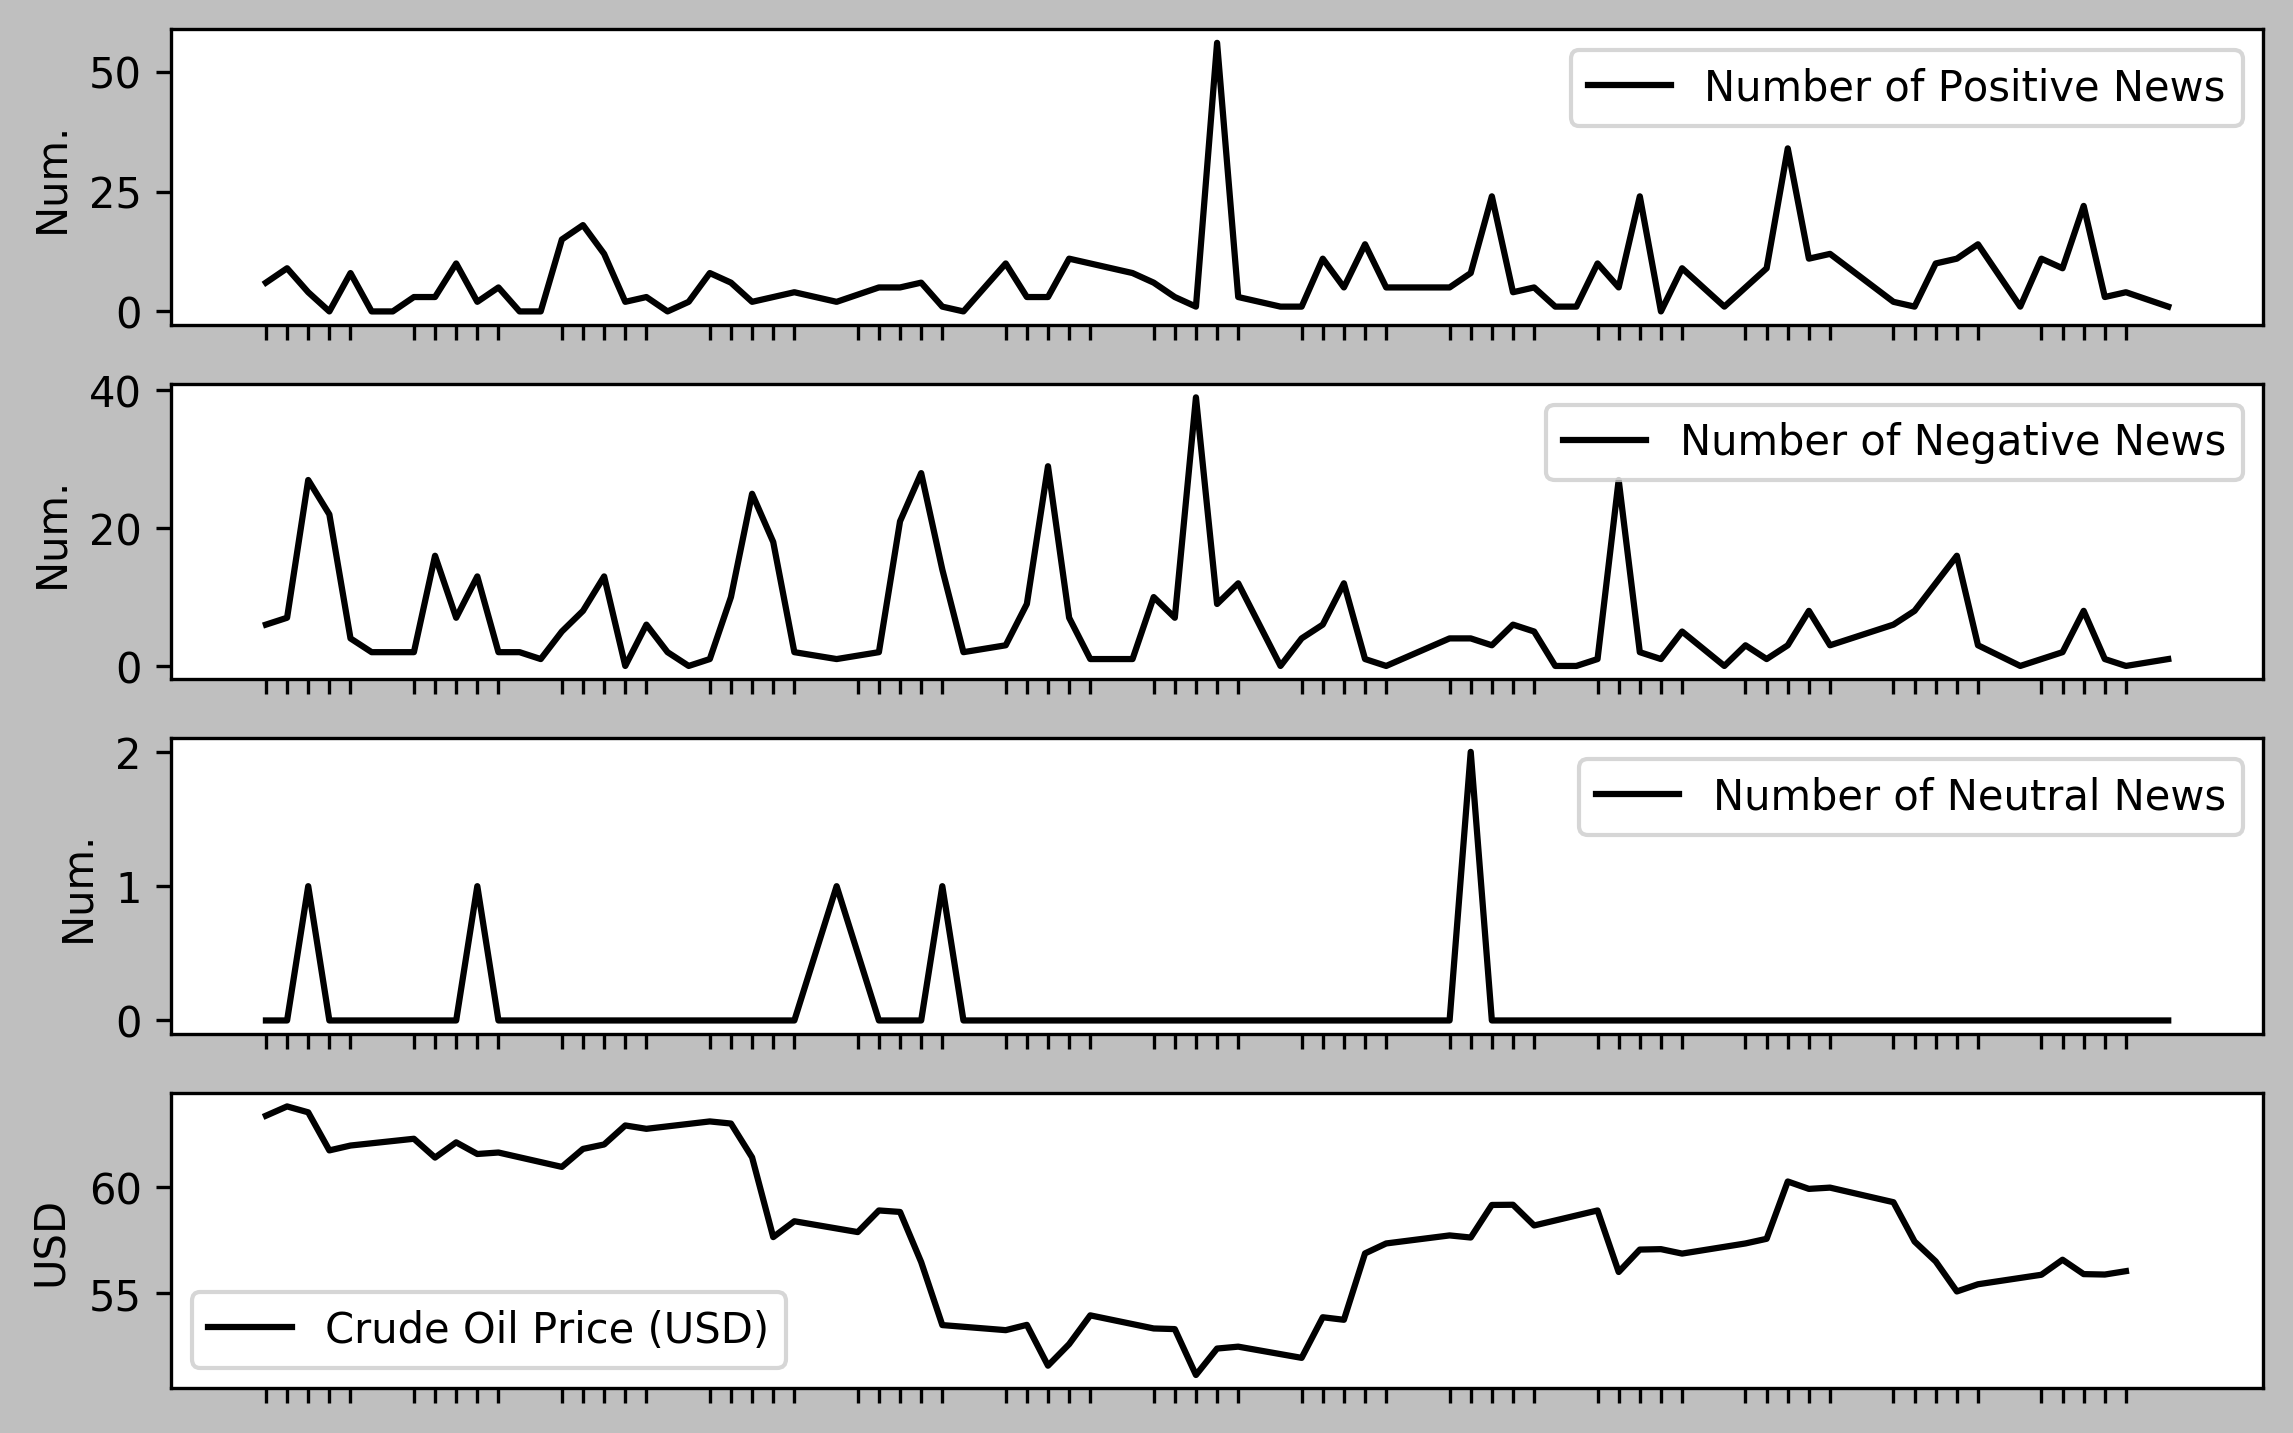

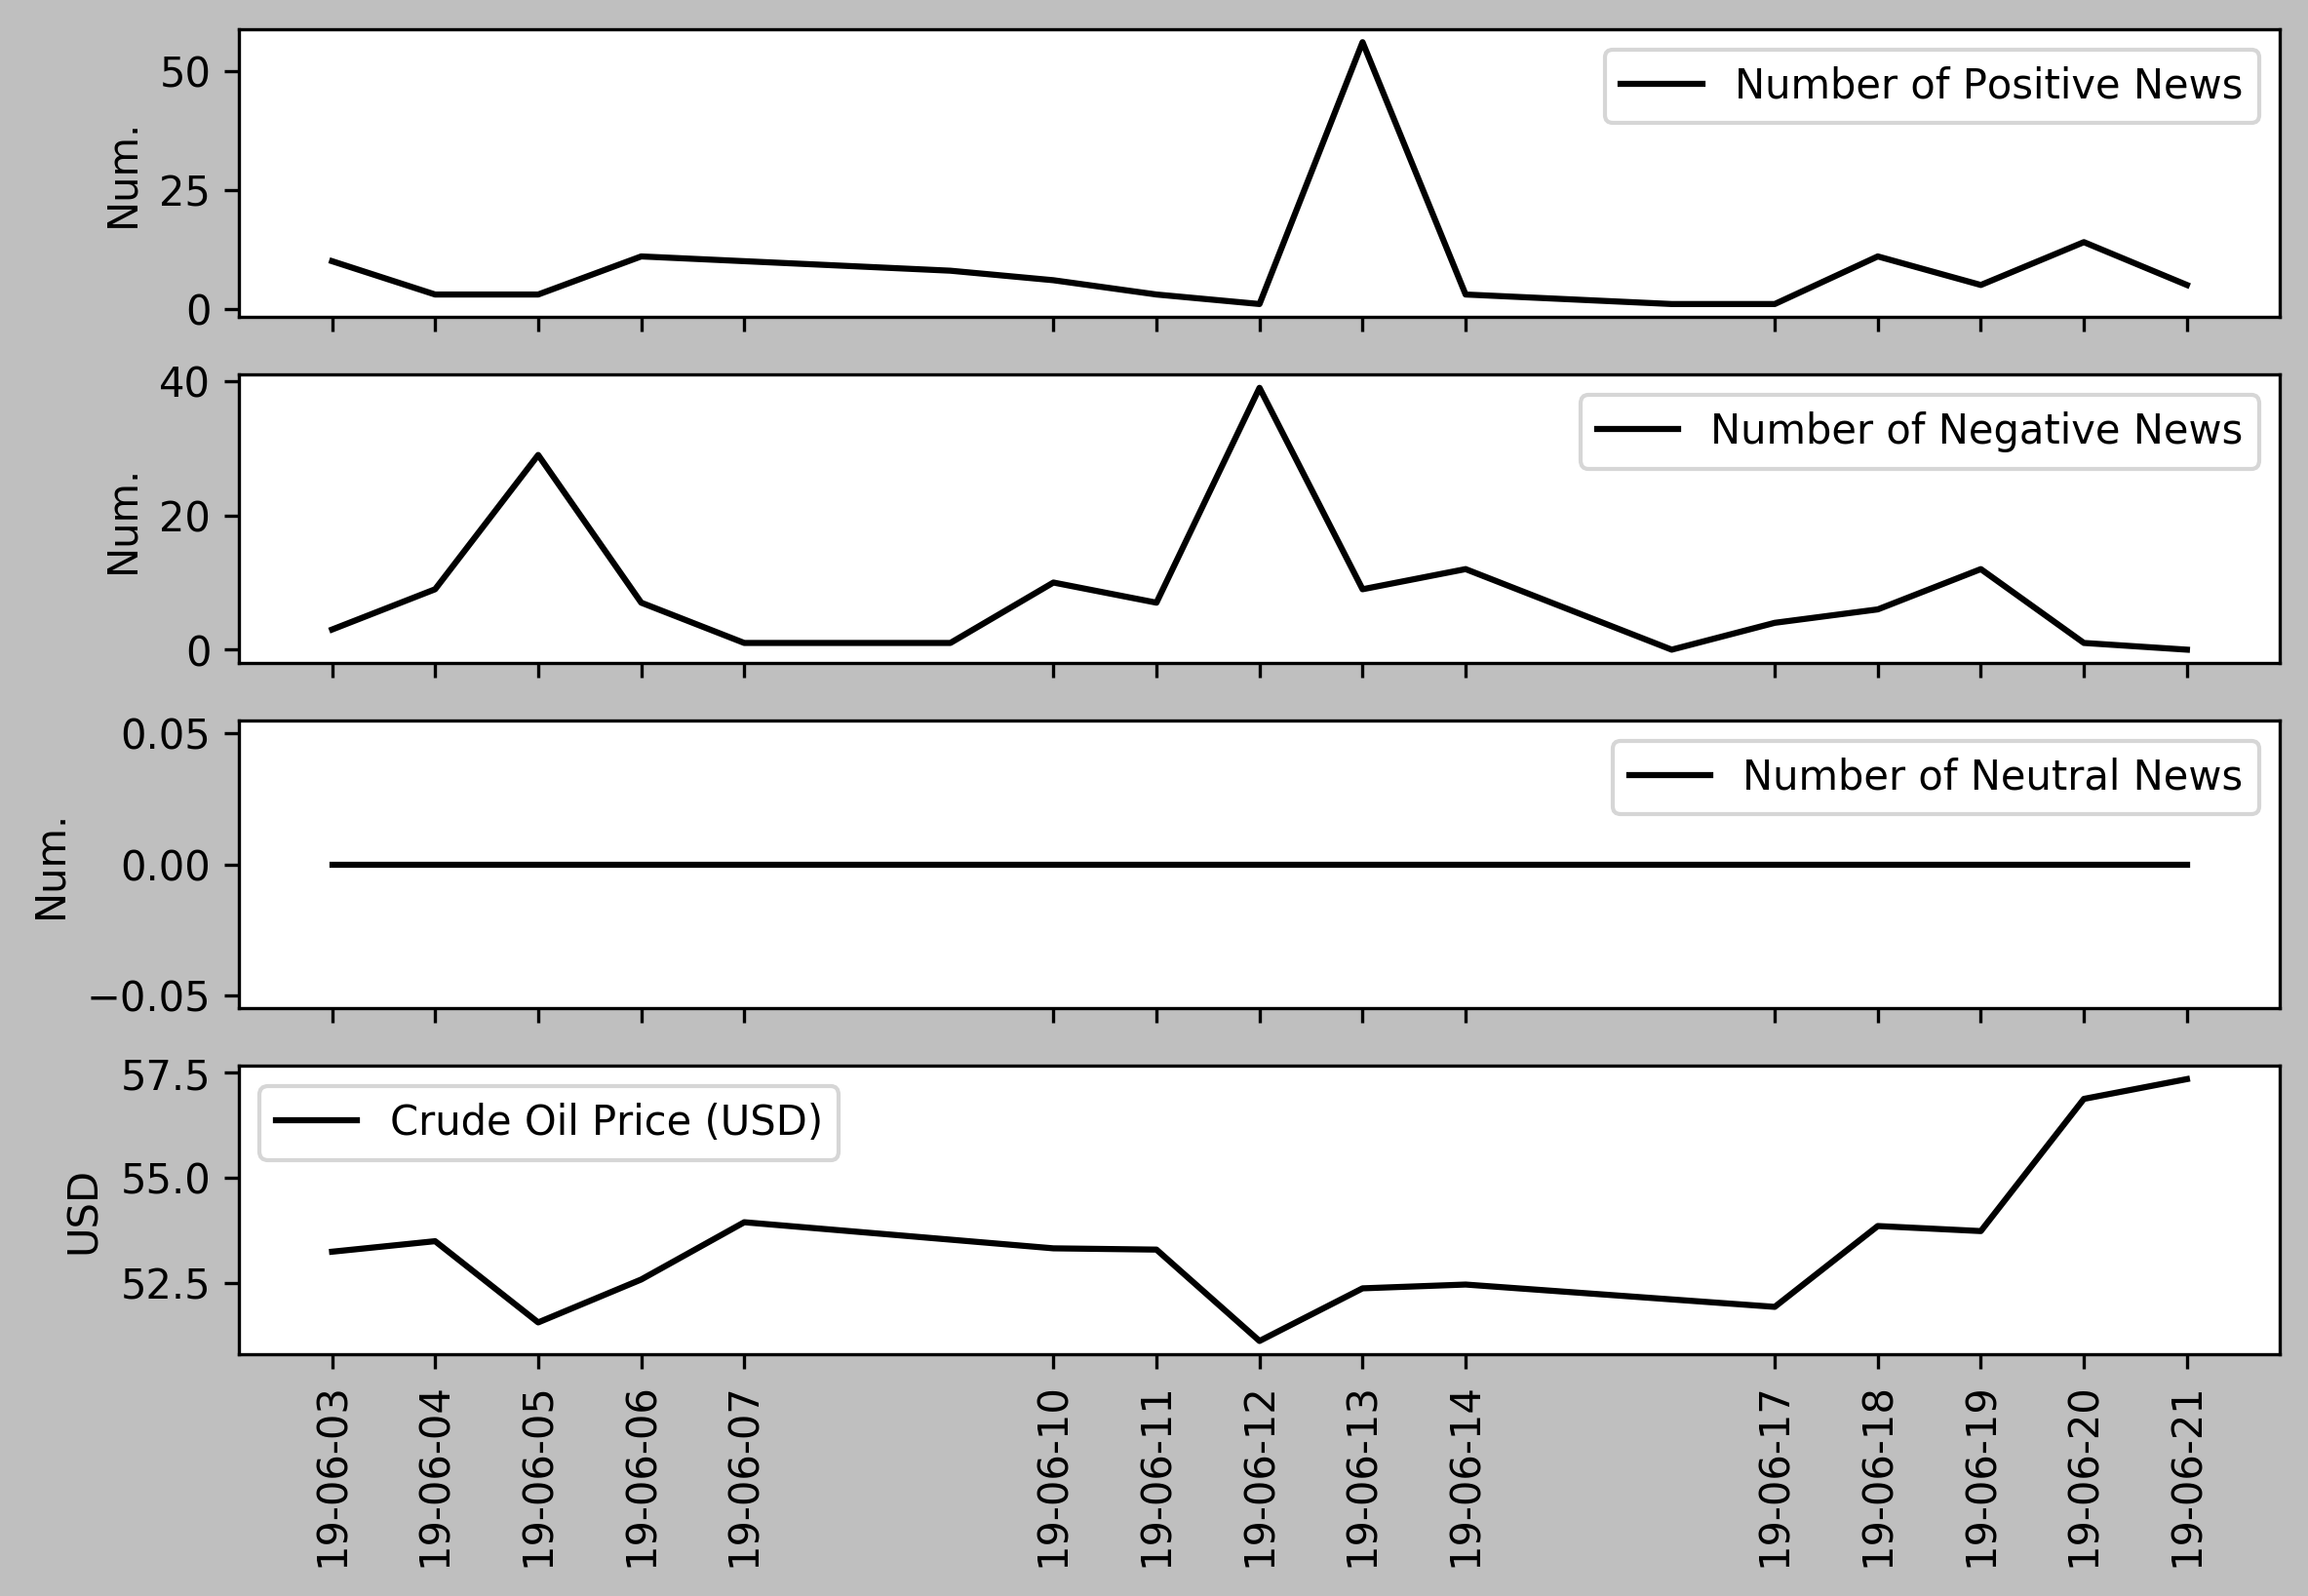

In [98]:
date = datetime(2019, 6, 13)
ts_centre_plot(df, df_oil, "ESS", date, delta_days=45, save_to=fig_path+"20190612_45d.png")
ts_centre_plot(df, df_oil, "ESS", date, delta_days=10, save_to=fig_path+"20190612_10d.png")